In this notebook we work to derive some important information from the paper. We aim to find out 

- age distribution
- distribution of length of time (after first) for check up

And importantly (stat-wise)

>  We aim to find whether there is a correlation in the age at initial prosthetic implantation and how long it takes for people need a follow up appointment

In [25]:
# Import the relevant data modules
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

If we first want to visualise the ages in the study we should identify the relevant table (in this case table 2) and work from there

In [26]:
df = pd.read_csv('Table2extract.csv')
#define variable and attach it to the imported excel comma file from folder
df.head()   
#print of only the top of the colloumn (simplified view)

,ID,Age at Prior Fusion (mo),Age at VEPTR (yr),Age at Last Follow-up CT (yr),Length of Follow-up(yr),Cobb Angle Preoperative,Cobb angle Postoperative,Cobb Angle Last,Thoracic Spine Length (cm) Pre Operative,Thoracic Spine Length (cm) Postoperative,Thoracic Spine Length (cm) Last,Change in Thoracic Spine Length After Initial VEPTR (cm) [last postoperative (cm)],Grovvth/Year Thoracic Spine After Initial Operation (cm) [last — postoperative/ yr (crVyr)]
0,a,NaN,2.1,7.3,5.2,47.0,29.0,29.0,12.3,15.3,20.7,5.4,1.0
1,b,NaN,9.9,14.7,4.8,30.0,20.0,32.0,NaN,21.1,26.1,5.0,1.0
2,c,NaN,1.2,5.2,4.0,49.0,47.0,49.0,107.0,12.2,16.0,38.0,1.0
3,d,NaN,3.4,8.8,5.4,34.0,49.0,49.0,NaN,NaN,21.2,NaN,NaN
4,e,NaN,1.0,5.7,4.7,33.0,12.0,16.0,105.0,10.1,13.9,3.8,8.0


Now we have a visualisation of column location it will help us with the rest, we would like to organise each of the columns into groups (for pie) so we cut out the data into bins of certain value ranges

In [27]:
df['bins1'] = pd.cut(df['Age at VEPTR (yr)'], bins=[0, 2, 4, 6, 8, 10, 15], labels=["0-2", "2-4", "4-6","6-8","8-10","10-12"])
df['bins2'] = pd.cut(df['Length of Follow-up(yr)'], bins=[0, 1, 2, 3, 4, 5, 6], labels=["0-1", "1-2", "2-3", "3-4", "4-5", "5-6"])

# df = pandas dataframea
# df['bins'] - adds a new collumn to the dataframe
# data is extracted from original csv using the cut() function
# the data cut is the collumn 'Age at VEPTR (yr)
# the parameter bins controls the characterstics for the grouping of the values
# the values are split into bins depending on the values in the square bracket

df1 = df.groupby(['Age at VEPTR (yr)', 'bins1']).size().unstack(fill_value=0)
df2 = df.groupby(['Age at Last Follow-up CT (yr)', 'bins2']).size().unstack(fill_value=0)
# groupby - groups data!
# size - sums the number of occurences of data 
# unstack - pivots the data into a new dataframe where the new bins become collumns
# fillvalue = 0 - makes sure that empty data entry are taken as zero - not always neccesary but nice to have

# Display the first DataFrame
print("DataFrame 1:")
print(df1.head())

# Display the second DataFrame
print("\nDataFrame 2:")
print(df2.head())

DataFrame 1:
bins1              0-2  2-4  4-6  6-8  8-10  10-12
Age at VEPTR (yr)                                 
0.6                  1    0    0    0     0      0
0.8                  1    0    0    0     0      0
0.9                  2    0    0    0     0      0
1.0                  2    0    0    0     0      0
1.2                  1    0    0    0     0      0

DataFrame 2:
bins2                          0-1  1-2  2-3  3-4  4-5  5-6
Age at Last Follow-up CT (yr)                              
1.4                              2    0    0    0    0    0
1.9                              1    0    0    0    0    0
2.5                              0    1    0    0    0    0
3.4                              0    1    0    0    0    0
3.5                              0    2    0    0    0    0


C:\Users\Luke\AppData\Local\Temp\ipykernel_4136\2923997514.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = df.groupby(['Age at VEPTR (yr)', 'bins1']).size().unstack(fill_value=0)
C:\Users\Luke\AppData\Local\Temp\ipykernel_4136\2923997514.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['Age at Last Follow-up CT (yr)', 'bins2']).size().unstack(fill_value=0)


Now We want to find the magnitude of occurence of each of the ranges

In [28]:
# Find the sums
Total02 = df1['0-2'].sum()
print(Total02)
Total24 = df1['2-4'].sum()
print(Total24)
Total46 = df1['4-6'].sum()
print(Total46)
Total68 = df1['6-8'].sum()
print(Total68)
Total810 = df1["8-10"].sum()
print(Total810)
Total1012 = df1["10-12"].sum()
print(Total1012)
# these functions are simple 
# Variable = dataframe[select data] summing function
# then print this, again for verification only

10
9
5
1
2
4


Now we have extracted we re-run to extract a second 

In [29]:
#now the data must be collated again
Total01 = df2['0-1'].sum()
print(Total01)
Total12 = df2['1-2'].sum()
print(Total12)
Total23 = df2['2-3'].sum()
print(Total23)
Total34 = df2['3-4'].sum()
print(Total34)
Total45 = df2['4-5'].sum()
print(Total45)
Total56 = df2['5-6'].sum()
print(Total56)
# these functions are simple 
# Variable = dataframe[select data] summing function
# then print this, again for verification only

7
5
6
4
6
2


Now, we want to visualise the two extracted dataframes onto piecharts

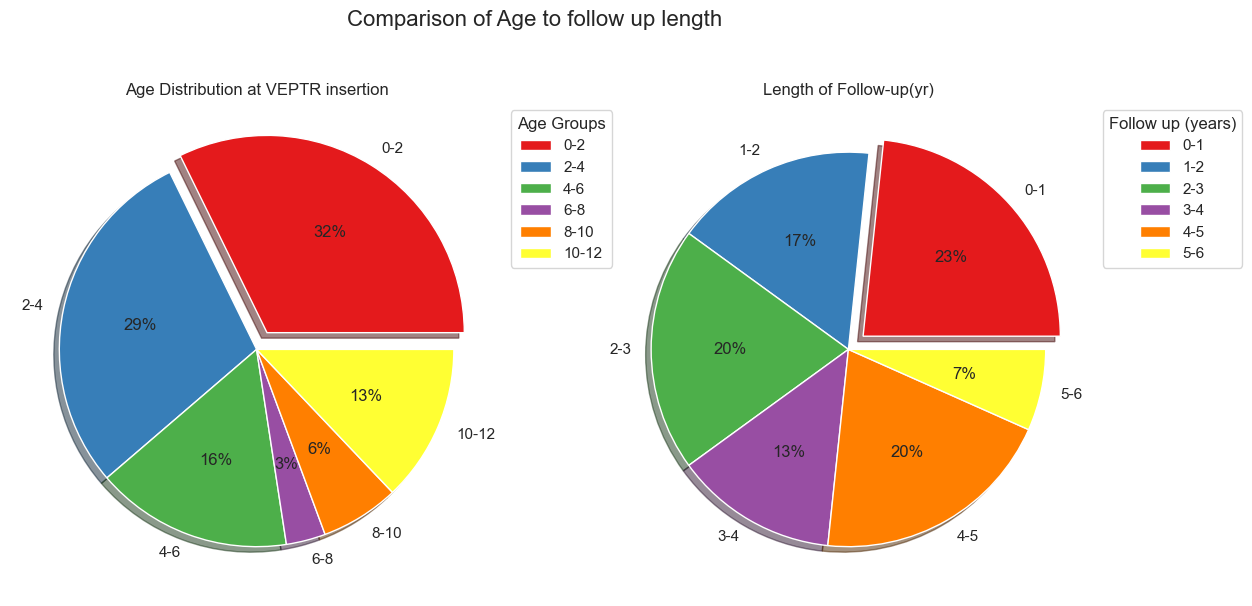

In [36]:
# First Pie Chart

# Crrate a new data frame called df 1 that uses the arrays collated above, indexs each of these for use in plotting
df1 = pd.DataFrame({'Ages': [Total02, Total24, Total46, Total68, Total810, Total1012]}, index=["0-2", "2-4", "4-6","6-8","8-10","10-12"])

# Creates a subplot
fig, axes = pp.subplots(1, 2, figsize=(14, 7))
# subplot(rows, columns screen dimensions=14*7)

# For deviation from default we self-define a color pallete using a seaborn preset
colors1 = sns.color_palette("Set1") 

# the first pie chart is made
plot1 = df1.plot.pie(y='Ages', autopct='%1.0f%%', ax=axes[0], explode=(0.1, 0, 0, 0, 0, 0), colors=colors1, shadow=True)
# pie = var with function pie using df columns and assign to first subplot 'Ages' + customisation
# autopct - creates percentage values for slices
# explode - highlights slice by extruding
# shadow - adds 3D effecgt

# Define titles of the subplot
axes[0].set_title('Age Distribution at VEPTR insertion')

# for a cleaner look we remove the label of the y axis - it is unecsessary
axes[0].set_ylabel('')

# Legend was overlapping the pies so added this
legend1 = axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
# adjust legend assigned to subplot 1 position to 'upper left' which is matplot pre-defined loc, out of all that loc looks best

# Set title on first legend
legend1.set_title('Age Groups')

# This code chunk is identical for the second pie chart with some exception, the array dimensions are different so function defs are longer
# and of course the variable names are different, the strange order is due to the two graphs being plotted apart then upon second thought
# they were subplotted

df2 = pd.DataFrame({'Ages': [Total01, Total12, Total23, Total34, Total45, Total56]}, index=["0-1", "1-2", "2-3", "3-4", "4-5", "5-6"])
colors2 = sns.color_palette("Set1") 
plot2 = df2.plot.pie(y='Ages', autopct='%1.0f%%', ax=axes[1], explode=(0.1, 0, 0, 0, 0, 0), colors=colors2, shadow=True)
axes[1].set_title('Length of Follow-up(yr)')
axes[1].set_ylabel('')
legend2 = axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
legend2.set_title('Follow up (years)')

# Define the title of the two subplots 
fig.suptitle('Comparison of Age to follow up length', fontsize=16)

# finally print the stored figures
pp.show()

In [31]:
df.head()

,ID,Age at Prior Fusion (mo),Age at VEPTR (yr),Age at Last Follow-up CT (yr),Length of Follow-up(yr),Cobb Angle Preoperative,Cobb angle Postoperative,Cobb Angle Last,Thoracic Spine Length (cm) Pre Operative,Thoracic Spine Length (cm) Postoperative,Thoracic Spine Length (cm) Last,Change in Thoracic Spine Length After Initial VEPTR (cm) [last postoperative (cm)],Grovvth/Year Thoracic Spine After Initial Operation (cm) [last — postoperative/ yr (crVyr)],bins1,bins2
0,a,NaN,2.1,7.3,5.2,47.0,29.0,29.0,12.3,15.3,20.7,5.4,1.0,2-4,5-6
1,b,NaN,9.9,14.7,4.8,30.0,20.0,32.0,NaN,21.1,26.1,5.0,1.0,8-10,4-5
2,c,NaN,1.2,5.2,4.0,49.0,47.0,49.0,107.0,12.2,16.0,38.0,1.0,0-2,3-4
3,d,NaN,3.4,8.8,5.4,34.0,49.0,49.0,NaN,NaN,21.2,NaN,NaN,2-4,5-6
4,e,NaN,1.0,5.7,4.7,33.0,12.0,16.0,105.0,10.1,13.9,3.8,8.0,0-2,4-5


In [32]:
# Cut out the two ages groups again - we modulated them too much so its easier to re-define
AGEVEP = df.iloc[:,2]
AGEFU = df.iloc[:,3]

# We want to create a new dataframe consisting of the two new arrays we pulled from the main df (called an index merge)
merged_df = pd.merge(AGEFU,AGEVEP,left_index=True,right_index=True)
# we use the merge function and def parameters
# we want the dataframes to be merged based on their existed indexes so we add it to true for both vars

# Due to the specifics of the calculation coming up we need to get rid of Nan values - the pearson corr calc fails with these present
merged_df = merged_df.dropna(subset=['Age at Last Follow-up CT (yr)','Age at VEPTR (yr)'])

# we drop a full print here so we can check rows for NaN
merged_df 

,Age at Last Follow-up CT (yr),Age at VEPTR (yr)
0,7.3,2.1
1,14.7,9.9
2,5.2,1.2
3,8.8,3.4
4,5.7,1.0
5,7.6,3.3
6,5.6,1.0
7,7.2,2.5
8,9.8,5.9
10,12.9,9.5


In [40]:
# We use scipy module to call def pearson function it computes a corr coef and a two tailed p val for non-corr test
Rval,_ = pearsonr(merged_df['Age at Last Follow-up CT (yr)'], merged_df['Age at VEPTR (yr)'])
# The result is a tuple but the p value isnt relevant for a corr scatter so - unused
# we define the params of the calc as the two ages coloumns calling from the merged_df dataframe

# Print to verify calc process occur
print(f"Rval: {Rval}")

Rval: 0.9016069206365663


Now, the correlation plot (scatter)

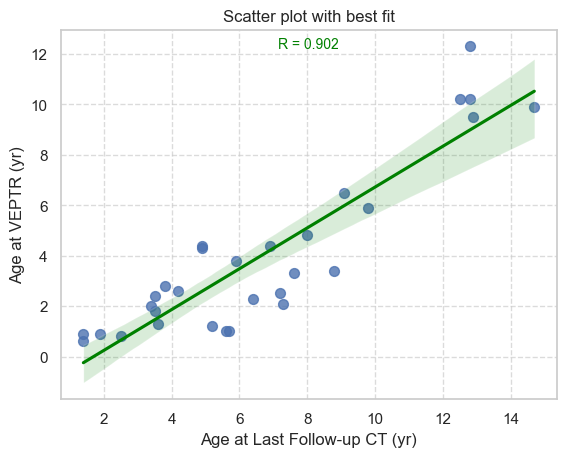

In [45]:
# We use seaborn here because it can auto-create a line of best fit

# Create a scatter plot using regression 
ax = sns.regplot(x=AGEFU,y=AGEVEP, data=merged_df, scatter_kws={'s' : 50}, line_kws={'color':'green'})
# define X and Y , scatter_kws and line_kws open the settings for the plot and overide the default values
# we change size to be 50 , and the line color to be green

# again changing default settings - change to gridded
sns.set(style='whitegrid')

# effect the grid lines created 
ax.grid(True, linestyle='--',alpha=0.7)
# determine the line type and the transparency

# Add an annotation using func
ax.annotate(f'R = {round(Rval, 3)}',xy=(0.5,0.95), xycoords='axes fraction', ha='center', fontsize=10, color='green')
# For better veiwing we print the Rval rounded to 3 decs, print Rval at the coords xy=
# .., define the method of defining coords
# .., set font size and color of font 

# Set plot title
ax.set_title('Scatter plot with best fit')

# print the stored plot
pp.show()

> We conclude that there is a **strong and positive correlation** between the two variables, as the age increases the time between appointments also increases